# equalize y value

In [28]:
import cv2
import os


# Get the workspace path
workspace_path = os.getcwd()
print(workspace_path)

# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))

# Convert the image to YUV color space
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Apply histogram equalization to the Y channel
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# Convert the image back to BGR color space
image_enhanced = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_equalize_y_value.jpg'), image_enhanced)







c:\Users\gbo10\Videos\research\counting_research_algorithms\src\image_enhancement


True

# equalize bands

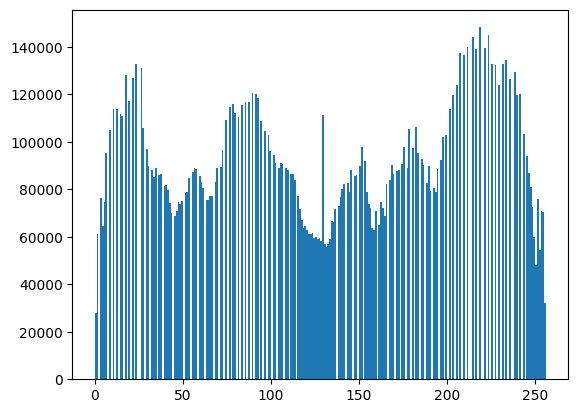

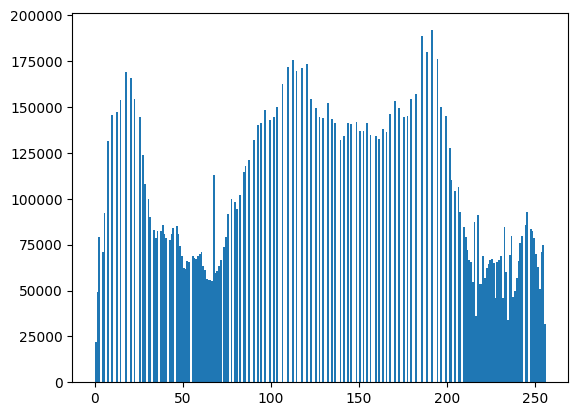

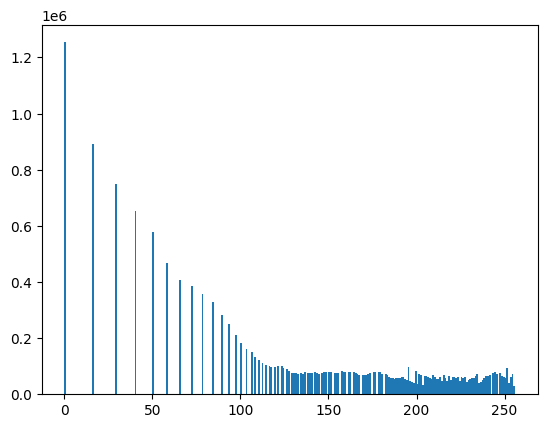

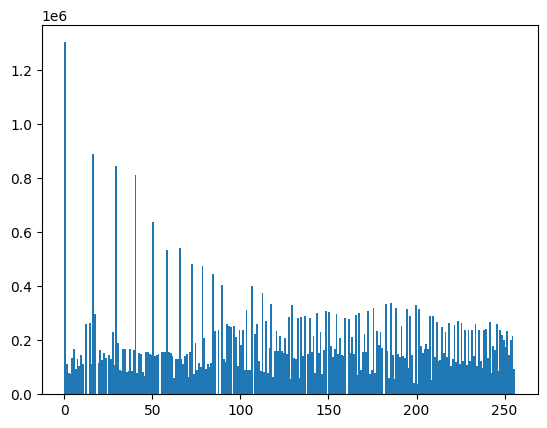

In [29]:
#add histogram equalization to three channels
# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))
#equlaize each band
b, g, r = cv2.split(image)
b = cv2.equalizeHist(b)
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)
#merge the bands
image_enhanced = cv2.merge((b, g, r))
# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_equalize_bands.jpg'), image_enhanced)
#show the histograms
import matplotlib.pyplot as plt
plt.hist(b.ravel(),256,[0,256])
plt.show()
plt.hist(g.ravel(),256,[0,256])
plt.show()
plt.hist(r.ravel(),256,[0,256])
plt.show()
plt.hist(image_enhanced.ravel(),256,[0,256])
plt.show()
#show the images



# use CLAHE

In [18]:
# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0.jpg'))

# Convert the image to LAB color space
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into L, A, and B channels
l, a, b = cv2.split(image_lab)

# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8, 8))
l_clahe = clahe.apply(l)

# Merge the CLAHE enhanced L channel with the original A and B channels
image_clahe = cv2.merge((l_clahe, a, b))

# Convert the image back to BGR color space
image_enhanced_clahe = cv2.cvtColor(image_clahe, cv2.COLOR_LAB2BGR)

# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_enhanced_clahe.jpg'), image_enhanced_clahe)


True

# sharpen image

In [20]:
import cv2
import os
import numpy as np

# Get the workspace path
workspace_path = os.getcwd()
print(workspace_path)

# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0.jpg'))

# Create a sharpening kernel
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

# Apply the sharpening kernel to the image
sharpened_image = cv2.filter2D(image, -1, kernel)

# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_sharpened.jpg'), sharpened_image)


c:\Users\gbo10\Videos\research\counting_research_algorithms\src\image_enhancement


True

# unsharp mask

In [24]:
#unsharp masking
# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0.jpg'))

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (9, 9), 0)

unsharp_mask = cv2.subtract(image, blurred_image)

# Apply unsharp masking
unsharp_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_unsharp.jpg'), unsharp_image)



True

# sobel

In [23]:
# Load the original image
original_image = cv2.imread(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0.jpg'))
  # Convert image to grayscale for edge detection

# Split the image into three bands
b, g, r = cv2.split(original_image)

# Apply Sobel edge detection to each band
sobel_x_b = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_b = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude_b = np.sqrt(sobel_x_b**2 + sobel_y_b**2)
sobel_magnitude_b = np.uint8(255 * sobel_magnitude_b / np.max(sobel_magnitude_b))

sobel_x_g = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_g = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude_g = np.sqrt(sobel_x_g**2 + sobel_y_g**2)
sobel_magnitude_g = np.uint8(255 * sobel_magnitude_g / np.max(sobel_magnitude_g))

sobel_x_r = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_r = cv2.Sobel(r, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude_r = np.sqrt(sobel_x_r**2 + sobel_y_r**2)
sobel_magnitude_r = np.uint8(255 * sobel_magnitude_r / np.max(sobel_magnitude_r))

# Merge the magnitude images of each band
sobel_magnitude = cv2.merge((sobel_magnitude_b, sobel_magnitude_g, sobel_magnitude_r))

cv2.imwrite(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_sobel_magnitude.jpg'), sobel_magnitude)



True

# canny

In [27]:

original_image = cv2.imread(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0.jpg'))


gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector on the grayscale image
# Adjust these threshold values (100 and 200) as needed for your specific image
edges = cv2.Canny(gray_image, 10, 20)

# Convert edges to 3 channels to use it as a mask for the original color image
edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Use bitwise operations to retain color information only on the edges
edges_on_color = cv2.bitwise_and(original_image, edges_colored)

cv2.imwrite(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_edges_on_color.jpg'), edges_on_color)

True

# erosiion

In [34]:
import cv2
import numpy as np

# Load the original image
image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))


# Define the structuring element (kernel)
kernel = np.ones((5,5), np.uint8)

# Apply erosion
eroded_image = cv2.erode(image, kernel, iterations = 2)

# Save the resulting image
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81e_eroded.jpg'),eroded_image)



True

# dilation

In [36]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))


# Define the structuring element (kernel)
kernel = np.ones((5,5), np.uint8)

# Apply erosion
dilated_image = cv2.dilate(original_image, kernel, iterations = 3)

# Save the resulting image
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_dilated.jpg'),dilated_image)



True

# auto adjust

In [37]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))


auto_contrast_image = cv2.normalize(original_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


# Save the resulting image
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_auto_contrast_image.jpg'),auto_contrast_image)



True

In [38]:
from PIL import Image

def boundedPixelValue(color, brightnessFactor):
	scaledValue = float(color * (1 + brightnessFactor))
	if scaledValue < 0:
		return 0
	elif scaledValue > 255:
		return 255

	return int(scaledValue)

im = Image.open(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))   
out = Image.new('RGB', im.size, 0xffffff)

brightnessFactor = 0.8

width, height = im.size
for x in range(width):
    for y in range(height):
        r,g,b = im.getpixel((x,y))

        updatedR = boundedPixelValue(r, brightnessFactor)
        updatedG = boundedPixelValue(g, brightnessFactor)
        updatedB = boundedPixelValue(b, brightnessFactor)

        out.putpixel((x,y), (updatedR, updatedG, updatedB))

out.save(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_bright.jpg'))

KeyboardInterrupt: 

In [44]:
import cv2
import numpy as np

def adjust_brightness(image, brightness_factor):
    # Convert the image to float
    image_float = image.astype(float)
    # Scale the pixel values
    image_float = image_float * (1 + brightness_factor)
    # Clip the values to the valid range (0 to 255)
    image_float = np.clip(image_float, 0, 255)
    # Convert back to 8-bit unsigned integer
    image_int = image_float.astype(np.uint8)
    return image_int

# Load the image
image = cv2.imread('GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg')

# Adjust the brightness
brightness_factor = 0.8
image_bright = adjust_brightness(image, brightness_factor)

# Save the image
cv2.imwrite('GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_bright.jpg', image_bright)

True

In [54]:
import cv2
import numpy as np

# Load the original RGB image
original_image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))

cv2.imshow('Original Image', original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Convert the RGB image to HSV (similar to HSI) color space
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# Split the HSV channels
h, s, v = cv2.split(hsv_image)
cv2.imshow('V Channel Before', v)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Perform contrast stretching on the V (Value, similar to Intensity) channel

v_min, v_max = np.min(v), np.max(v)
v_stretched = (v - v_min) * 255 / max((v_max - v_min), 1)  # add a small constant to the denominator
v_stretched = v_stretched.astype(np.uint8) # convert to 8-bit unsigned integer


cv2.imshow('V Channel After', v_stretched)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Merge the channels back and convert to RGB
hsv_stretched = cv2.merge([h, s, v_stretched])
rgb_stretched = cv2.cvtColor(hsv_stretched, cv2.COLOR_HSV2BGR)

cv2.imwrite((os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_sterched.jpg')), rgb_stretched)
print(f"Min and Max before stretching: {np.min(v)}, {np.max(v)}")
print(f"Min and Max after stretching: {np.min(v_stretched)}, {np.max(v_stretched)}")

Min and Max before stretching: 1, 255
Min and Max after stretching: 0, 255


In [49]:
print(f"Original image shape: {original_image.shape}")
print(f"Output image path: {os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_sterched.jpg')}")

Original image shape: (2988, 5312, 3)
Output image path: c:\Users\gbo10\Videos\research\counting_research_algorithms\src\image_enhancement\GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_sterched.jpg


In [61]:
from PIL import Image


inputImage = Image.open(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg')).convert('L')      
outputImage = Image.new('L', inputImage.size)


# Convert the image to a NumPy array for faster processing
image_array = np.array(inputImage)

# Find the minimum and maximum pixel intensities
min_intensity = np.min(image_array)
max_intensity = np.max(image_array)

epsilon = 1e-5  # Small constant
stretched_array = 255 * (image_array - min_intensity) / (max_intensity - min_intensity + epsilon)
stretched_array = np.clip(stretched_array, 0, 255)  # Ensure values are within [0, 255]

stretched_array = stretched_array.astype(np.uint8)

# Convert the stretched array back to an Image object
outputImage = Image.fromarray(stretched_array)


outputImage.save(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_cont.jpg'))

In [62]:
import cv2
import numpy as np
import os

# Assuming 'workspace_path' is already defined
# Load the original RGB image
input_image_path = os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg')
original_image = cv2.imread(input_image_path)

# Convert the RGB image to HSV
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# Extract the Value channel
v_channel = hsv_image[:, :, 2]

# Compute the 2nd and 98th percentiles of the Value channel
p2, p98 = np.percentile(v_channel, (2, 98))

# Perform contrast stretching on the Value channel
v_rescaled = np.clip((v_channel - p2) * 255 / (p98 - p2), 0, 255).astype(np.uint8)

# Update the Value channel in the HSV image
hsv_image[:, :, 2] = v_rescaled

# Convert the HSV image back to RGB
rgb_rescaled = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Save the resulting image
output_image_path = os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_cont.jpg')
cv2.imwrite(output_image_path, rgb_rescaled)

print(f"Contrast-stretched RGB image saved as {output_image_path}")


Contrast-stretched image saved as c:\Users\gbo10\Videos\research\counting_research_algorithms\src\image_enhancement\GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_cont.jpg
